In [1]:
# Importing dependencies
import time
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
from datetime import datetime
from config import weather_api_key
from scipy.stats import linregress

In [2]:
# Building API URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [3]:
# Compiling a list of random latitudes and longitudes
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Compiling a list of the nearest city to each random coordinate
coordinates = list(lat_lngs)

cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
        
print(len(cities))

608


In [5]:
# Initializing data retrieval for each city, accounting for KeyErrors
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities): 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    city_url = url + "&q=" + city.replace(" ","+")
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | vardo
Processing Record 5 of Set 1 | mandleshwar
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | tangermunde
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | ewa beach
Processing Record 15 of Set 1 | kaeo
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | bukavu
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Proces

Processing Record 38 of Set 4 | riberalta
Processing Record 39 of Set 4 | blagoyevo
Processing Record 40 of Set 4 | victoria
Processing Record 41 of Set 4 | kieta
Processing Record 42 of Set 4 | lucapa
Processing Record 43 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 4 | nome
Processing Record 45 of Set 4 | lolua
City not found. Skipping...
Processing Record 46 of Set 4 | flin flon
Processing Record 47 of Set 4 | bonthe
Processing Record 48 of Set 4 | gangotri
City not found. Skipping...
Processing Record 49 of Set 4 | tautira
Processing Record 50 of Set 4 | aksarka
Processing Record 1 of Set 5 | yabrud
Processing Record 2 of Set 5 | qaqortoq
Processing Record 3 of Set 5 | rio gallegos
Processing Record 4 of Set 5 | qui nhon
Processing Record 5 of Set 5 | galle
Processing Record 6 of Set 5 | slave lake
Processing Record 7 of Set 5 | banda aceh
Processing Record 8 of Set 5 | dinant
Processing Record 9 of Set 5 | kalispell
Processing Record 10 of Set 5 |

City not found. Skipping...
Processing Record 28 of Set 8 | kudahuvadhoo
Processing Record 29 of Set 8 | vega de alatorre
Processing Record 30 of Set 8 | marovoay
Processing Record 31 of Set 8 | pochutla
Processing Record 32 of Set 8 | talcahuano
Processing Record 33 of Set 8 | leningradskiy
Processing Record 34 of Set 8 | pajusti
Processing Record 35 of Set 8 | noumea
Processing Record 36 of Set 8 | yangliuqing
Processing Record 37 of Set 8 | meulaboh
Processing Record 38 of Set 8 | nizwa
Processing Record 39 of Set 8 | kollumerland
City not found. Skipping...
Processing Record 40 of Set 8 | bandar-e torkaman
City not found. Skipping...
Processing Record 41 of Set 8 | tabialan
City not found. Skipping...
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | dudinka
Processing Record 44 of Set 8 | natal
Processing Record 45 of Set 8 | karratha
Processing Record 46 of Set 8 | snyder
Processing Record 47 of Set 8 | novobirilyussy
Processing Record 48 of Set 8 | pathein
P

Processing Record 14 of Set 12 | makakilo city
Processing Record 15 of Set 12 | qadian
Processing Record 16 of Set 12 | chifeng
Processing Record 17 of Set 12 | berlevag
Processing Record 18 of Set 12 | huarmey
Processing Record 19 of Set 12 | ijaki
City not found. Skipping...
Processing Record 20 of Set 12 | devrek
Processing Record 21 of Set 12 | san quintin
Processing Record 22 of Set 12 | rungata
City not found. Skipping...
Processing Record 23 of Set 12 | lake city
Processing Record 24 of Set 12 | belle fourche
Processing Record 25 of Set 12 | trairi
Processing Record 26 of Set 12 | shingu
Processing Record 27 of Set 12 | ambilobe
Processing Record 28 of Set 12 | lebedyn
Processing Record 29 of Set 12 | oxford
Processing Record 30 of Set 12 | abu kamal
Processing Record 31 of Set 12 | lingao
Processing Record 32 of Set 12 | safwah
City not found. Skipping...
Processing Record 33 of Set 12 | rockport
Processing Record 34 of Set 12 | kahului
Processing Record 35 of Set 12 | ron
Proc

In [6]:
print(len(city_data))

557


In [7]:
# Converting data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,69.01,63,84,18.48,PF,2022-08-06 17:17:46
1,Faanui,-16.4833,-151.7500,77.90,76,71,24.70,PF,2022-08-06 17:19:01
2,Punta Arenas,-53.1500,-70.9167,39.31,81,75,6.91,CL,2022-08-06 17:14:28
3,Vardo,70.3705,31.1107,51.78,93,100,10.36,NO,2022-08-06 17:19:02
4,Mandleshwar,22.1833,75.6667,82.35,81,99,4.76,IN,2022-08-06 17:19:03


In [8]:
# Reformatting DataFrame to promote readability
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-08-06 17:17:46,-23.1203,-134.9692,69.01,63,84,18.48
1,Faanui,PF,2022-08-06 17:19:01,-16.4833,-151.7500,77.90,76,71,24.70
2,Punta Arenas,CL,2022-08-06 17:14:28,-53.1500,-70.9167,39.31,81,75,6.91
3,Vardo,NO,2022-08-06 17:19:02,70.3705,31.1107,51.78,93,100,10.36
4,Mandleshwar,IN,2022-08-06 17:19:03,22.1833,75.6667,82.35,81,99,4.76
5,Ushuaia,AR,2022-08-06 17:19:03,-54.8000,-68.3000,35.26,80,0,3.44
6,Hermanus,ZA,2022-08-06 17:19:04,-34.4187,19.2345,56.80,75,99,22.64
7,Kapaa,US,2022-08-06 17:19:04,22.0752,-159.3190,73.72,94,75,4.61
8,Tangermunde,DE,2022-08-06 17:19:05,52.5446,11.9765,71.94,30,56,1.99
9,Butaritari,KI,2022-08-06 17:19:05,3.0707,172.7902,81.84,77,83,15.12


In [9]:
# Converting DataFrame to CSV file
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [10]:
# Extracting data points from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
today = time.strftime("%x")
today

'08/06/22'

<function matplotlib.pyplot.show(close=None, block=None)>

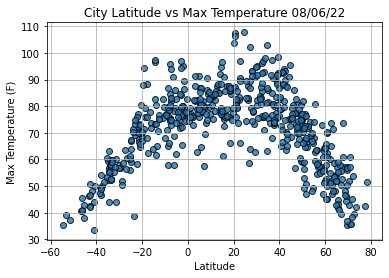

In [12]:
# Building the scatterplot to chart how latitude impacts max temperature
plt.scatter(
    lats, 
    max_temps, 
    edgecolor = "black", linewidths = 1, marker = "o", 
    alpha = 0.8, label = "Cities"
)

plt.title(f"City Latitude vs Max Temperature {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

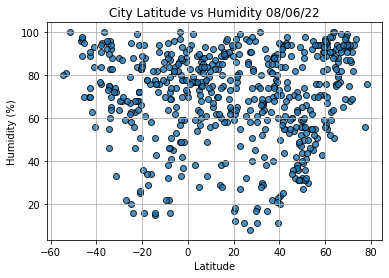

In [13]:
# Building the scatterplot to chart how latitude impacts humidity
plt.scatter(
    lats, 
    humidity, 
    edgecolor = "black", linewidths = 1, marker = "o", 
    alpha = 0.8, label = "Cities"
)

plt.title(f"City Latitude vs Humidity {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

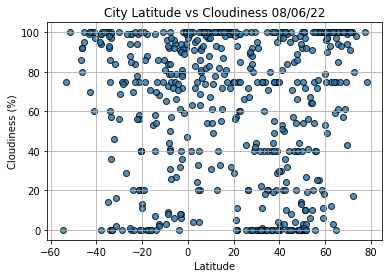

In [14]:
# Building the scatterplot to chart how latitude impacts cloudiness
plt.scatter(
    lats, 
    cloudiness, 
    edgecolor = "black", linewidths = 1, marker = "o", 
    alpha = 0.8, label = "Cities"
)

plt.title(f"City Latitude vs Cloudiness {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show

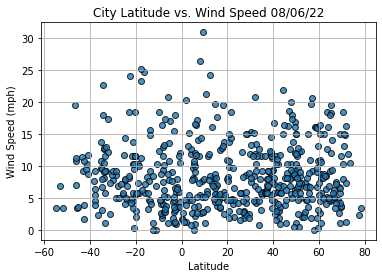

In [15]:
# Building the scatterplot to chart how latitude impacts wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [34]:
# Creating a funciton to plot the linear regression for given weather data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()

In [22]:
# Creating Northern and Southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

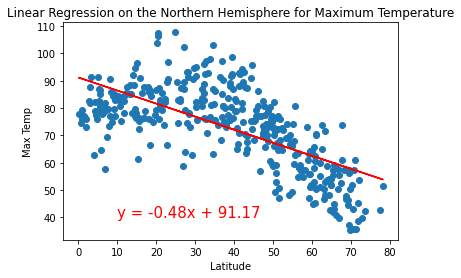

In [35]:
# Northern hemisphere linear regression for max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,40))

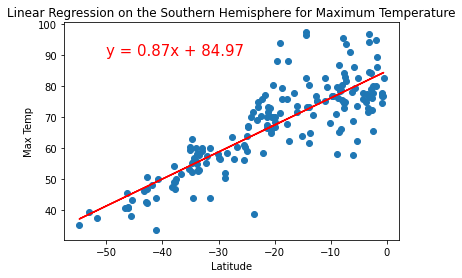

In [45]:
# Southern hemisphere linear regression for max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

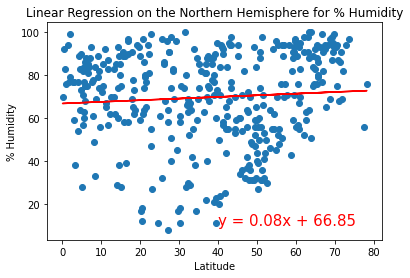

In [44]:
# Northern hemisphere linear regression for percent humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

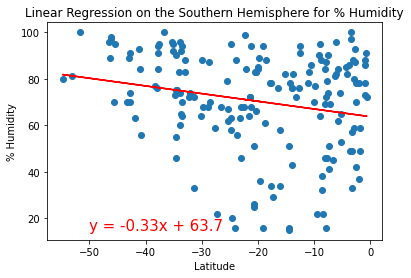

In [43]:
# Southern hemisphere linear regression for percent humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

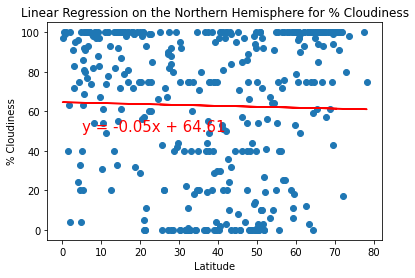

In [50]:
# Northern hemisphere linear regression for percent cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(5,50))

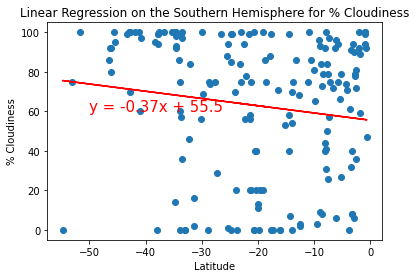

In [51]:
# Southern hemisphere linear regression for percent cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

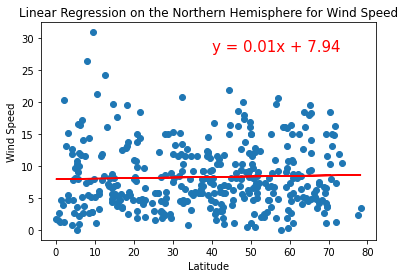

In [55]:
# Northern hemisphere linear regression for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,28))